In [19]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset

df = pd.read_csv('Churn_Modelling.csv')

df.sample(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9233,9234,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73,0
1257,1258,15647402,Wan,628,France,Female,38,3,0.00,2,1,1,48924.73,0
9664,9665,15595036,Doherty,726,Germany,Male,30,7,92847.59,1,1,0,146154.06,0
4289,4290,15642579,Chang,731,Spain,Female,37,1,128932.40,1,1,1,180712.52,0
8161,8162,15615352,Ebelechukwu,588,France,Male,31,4,99607.37,2,0,1,35877.03,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### The dataset provided consists of the following features:

- CustomerId: Unique identifier for each customer
- Surname: Surname of the customer
- CreditScore: Credit score of the customer
- Geography: Customer's country of residence
- Gender: Customer's gender
- Age: Age of the customer
- Tenure: Number of years the customer has been with the institution
- Balance: Bank account balance of the customer
- NumOfProducts: Number of products/services the customer has subscribed to
- HasCrCard: Whether the customer has a credit card (1 if yes, 0 if no)
- IsActiveMember: Whether the customer is an active member (1 if yes, 0 if no)
- EstimatedSalary: Estimated salary of the customer
- Exited: Whether the customer has churned (1 if yes, 0 if no)

# Exploratory Data Analysis and Pre-Processing¶


In [22]:
df.duplicated().sum()

0

In [23]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [24]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
#Duplicated values 
df.duplicated().sum()

0

In [26]:
#number of distinct elements in each attribute
df.nunique(axis=0)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [27]:
# Find features with one value

for column in df.columns:
    print(column,df[column].nunique())

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


In [28]:
# data cleaning 

df = df.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [29]:
# Explore the catagorical features 

categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['Exited']))]
categorical_features

['Geography', 'Gender']

In [30]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Geography and number of categories are 3
The feature is Gender and number of categories are 2


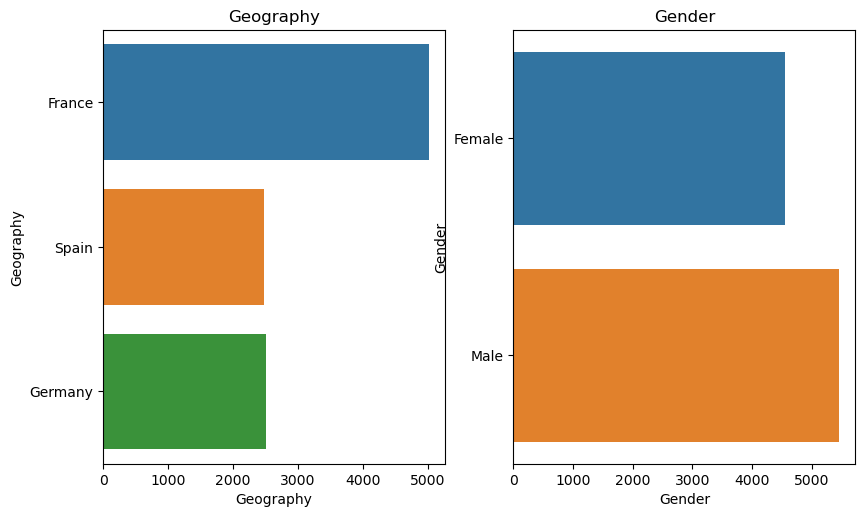

In [31]:
# check count based on categorical features

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [32]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3143,619,Germany,Female,41,8,142015.76,2,1,0,114323.66,0
1373,528,Germany,Female,46,9,135555.66,1,1,0,133146.03,1
677,739,Germany,Male,45,7,102703.62,1,0,1,147802.94,1
6171,617,Spain,Male,61,3,113858.95,1,1,1,38129.22,0
6330,744,France,Female,39,6,0.00,1,0,0,10662.58,0


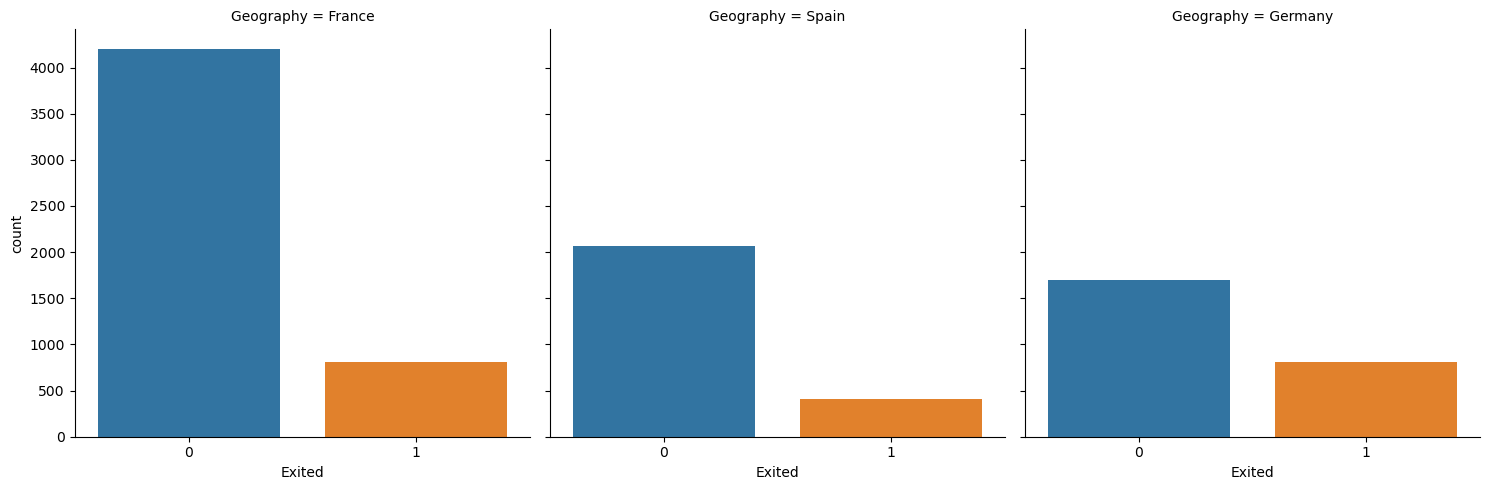

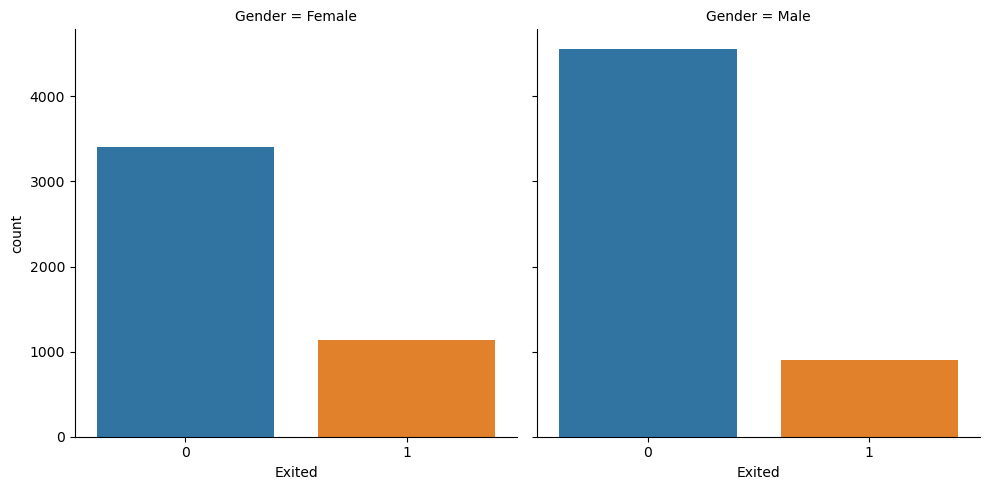

In [33]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable

for categorical_feature in categorical_features:
    sns.catplot(x='Exited', col=categorical_feature, kind='count', data= df)
plt.show()

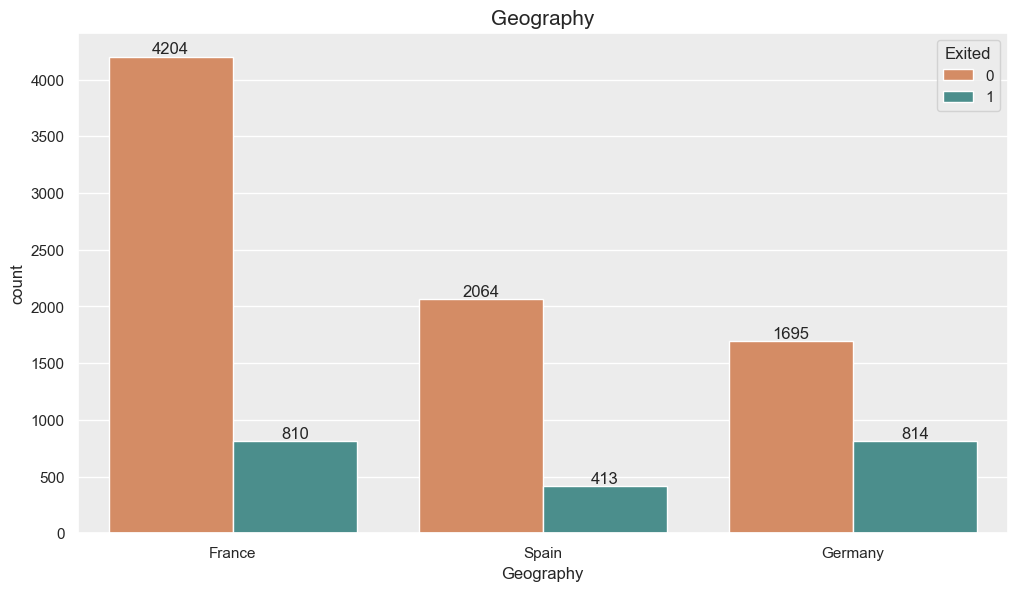

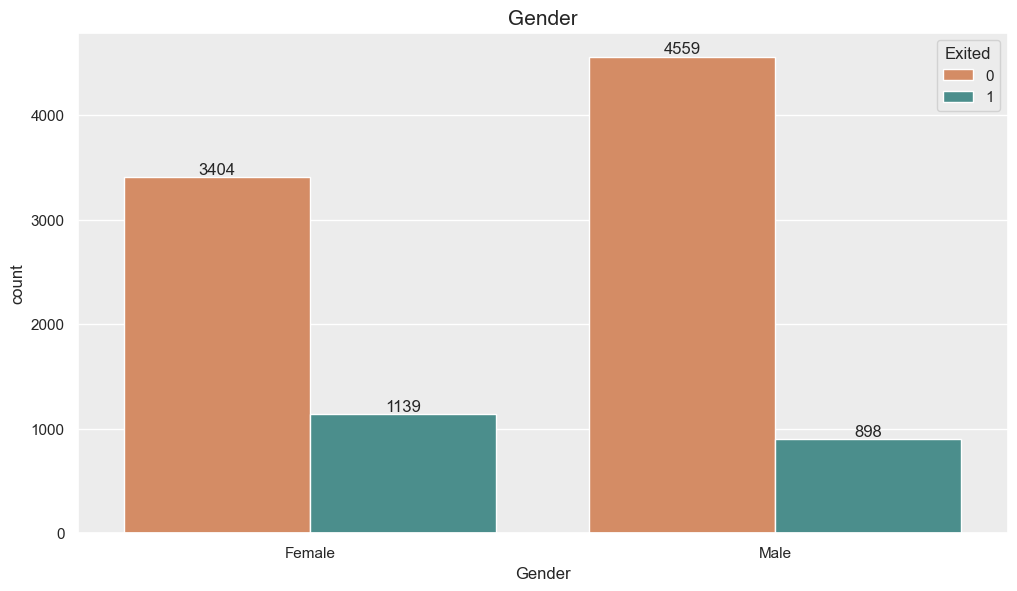

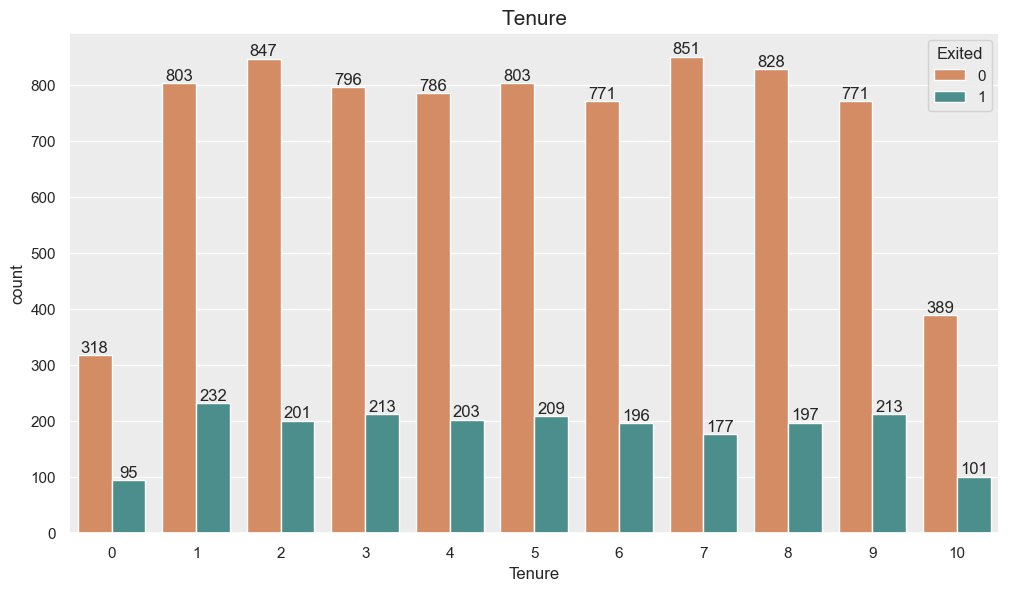

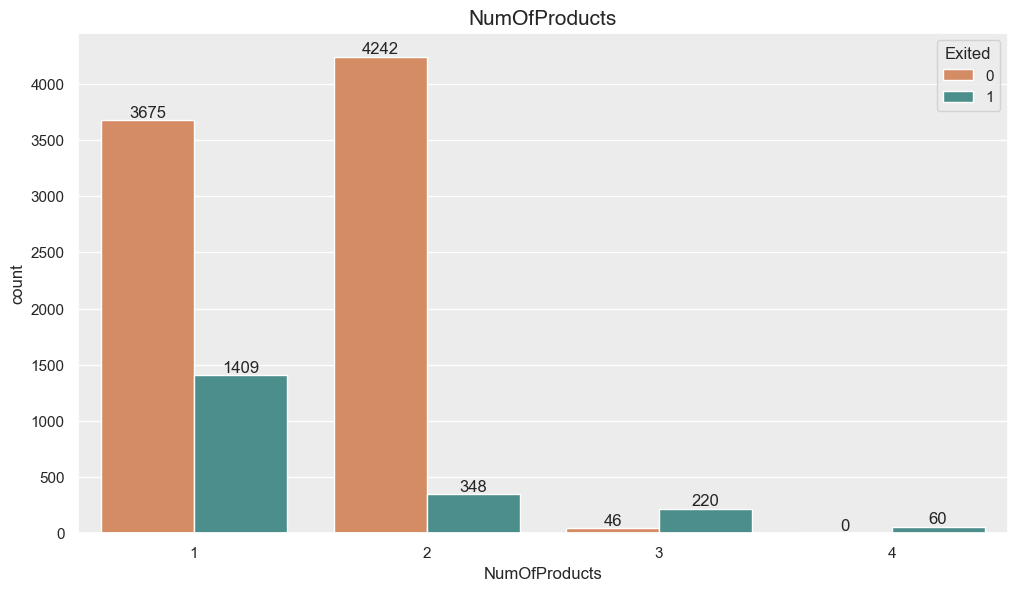

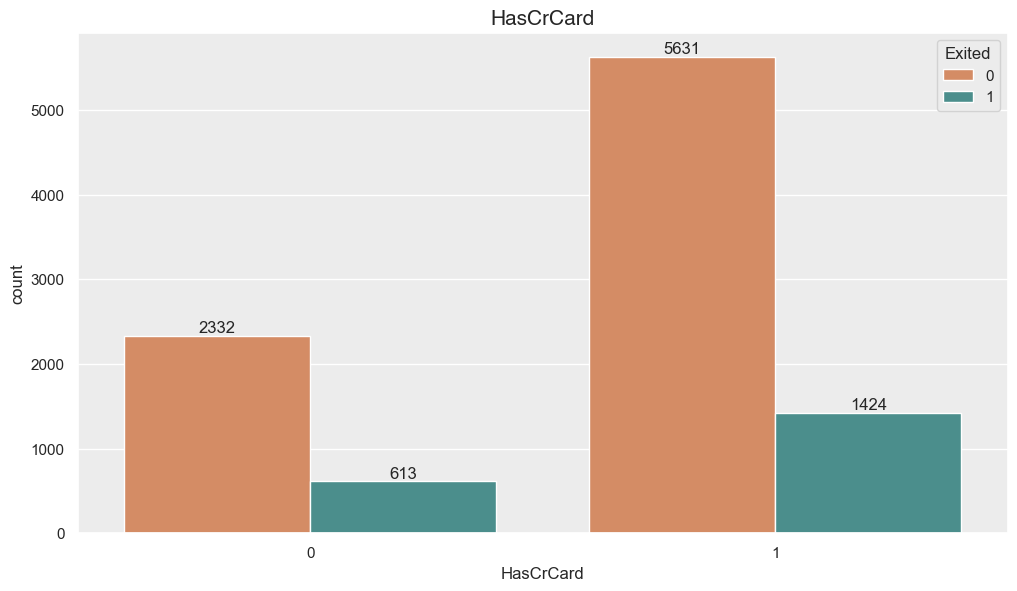

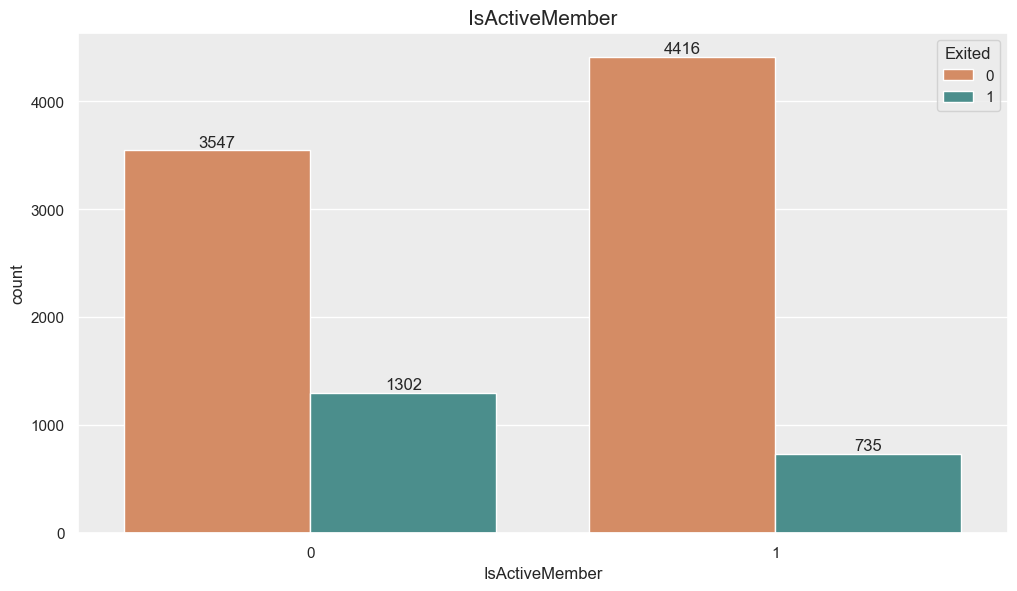

In [70]:
#create a list of categorical features and plot them

list_of_cat_features = df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]  
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.countplot(data = df, x = df[feature], hue = 'Exited', palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()


In [34]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Exited']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  8


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [47]:
# Find discreate numerical features 

discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 4


In [39]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['Exited']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 4


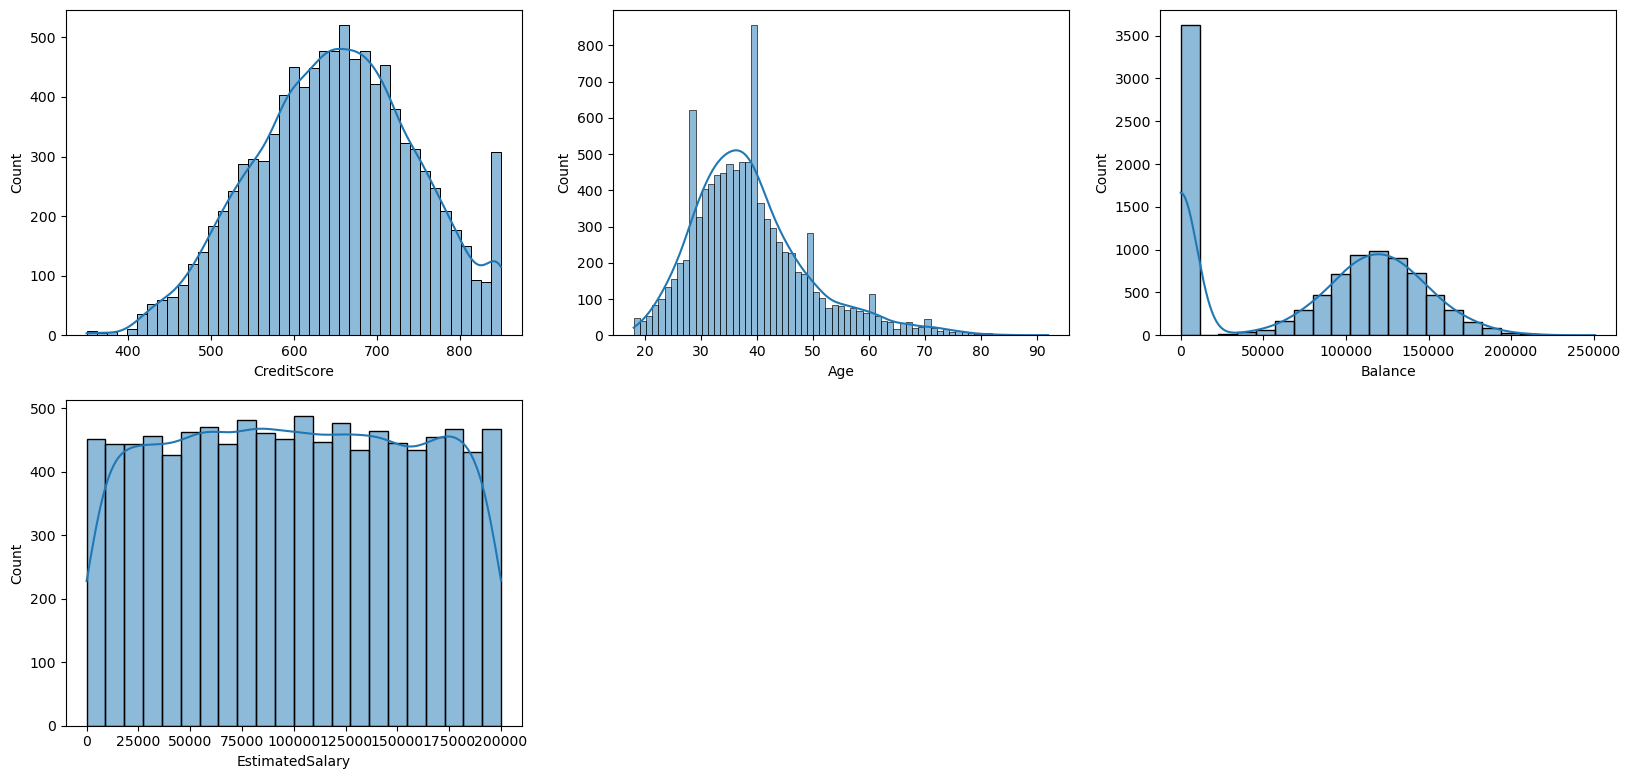

In [44]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    #sns.distplot(df[continuous_feature])
    sns.histplot(df[continuous_feature], kde=True)
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

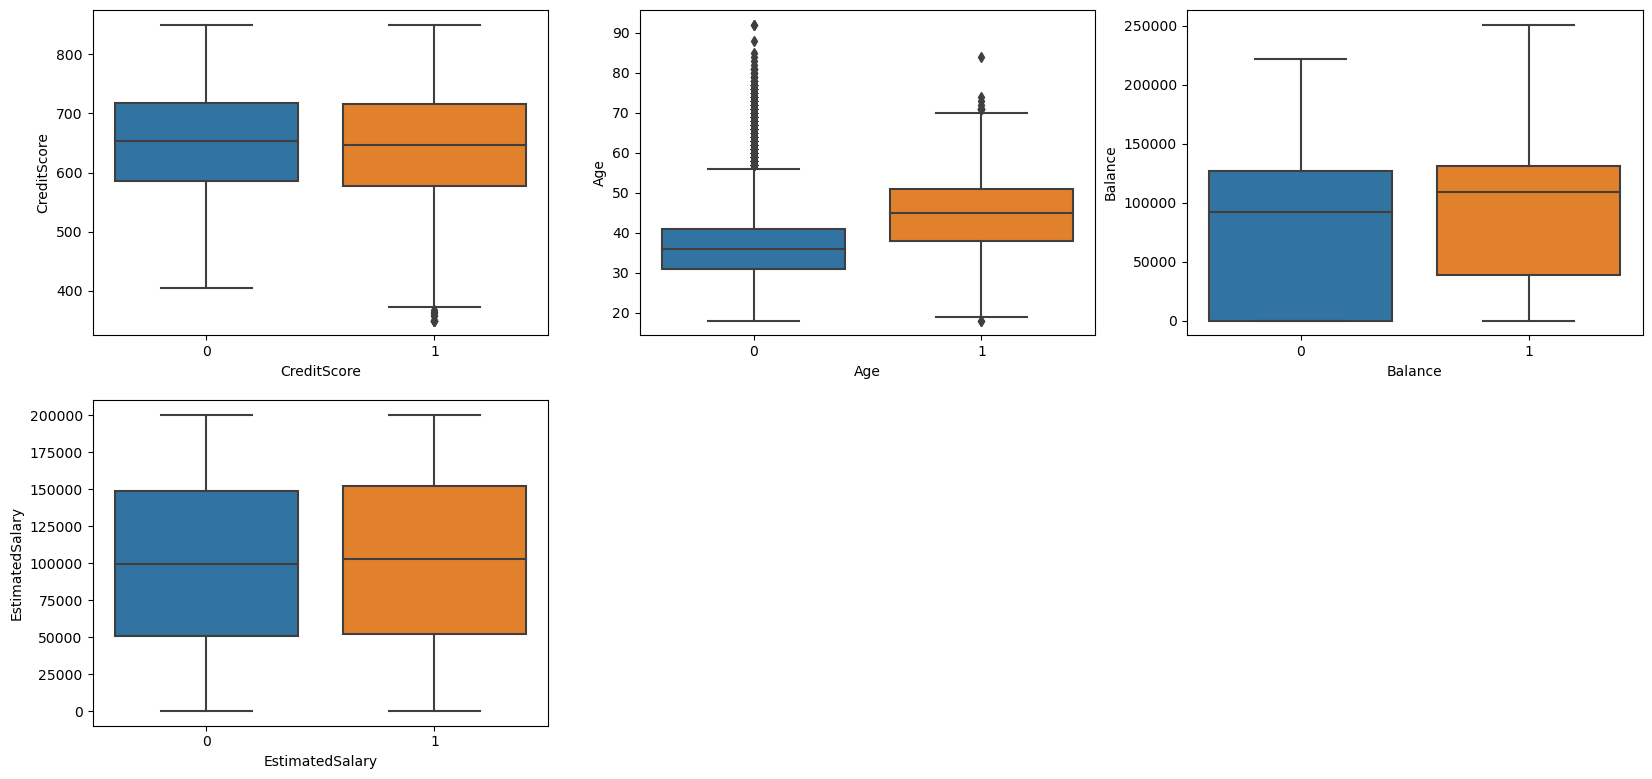

In [50]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Exited", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

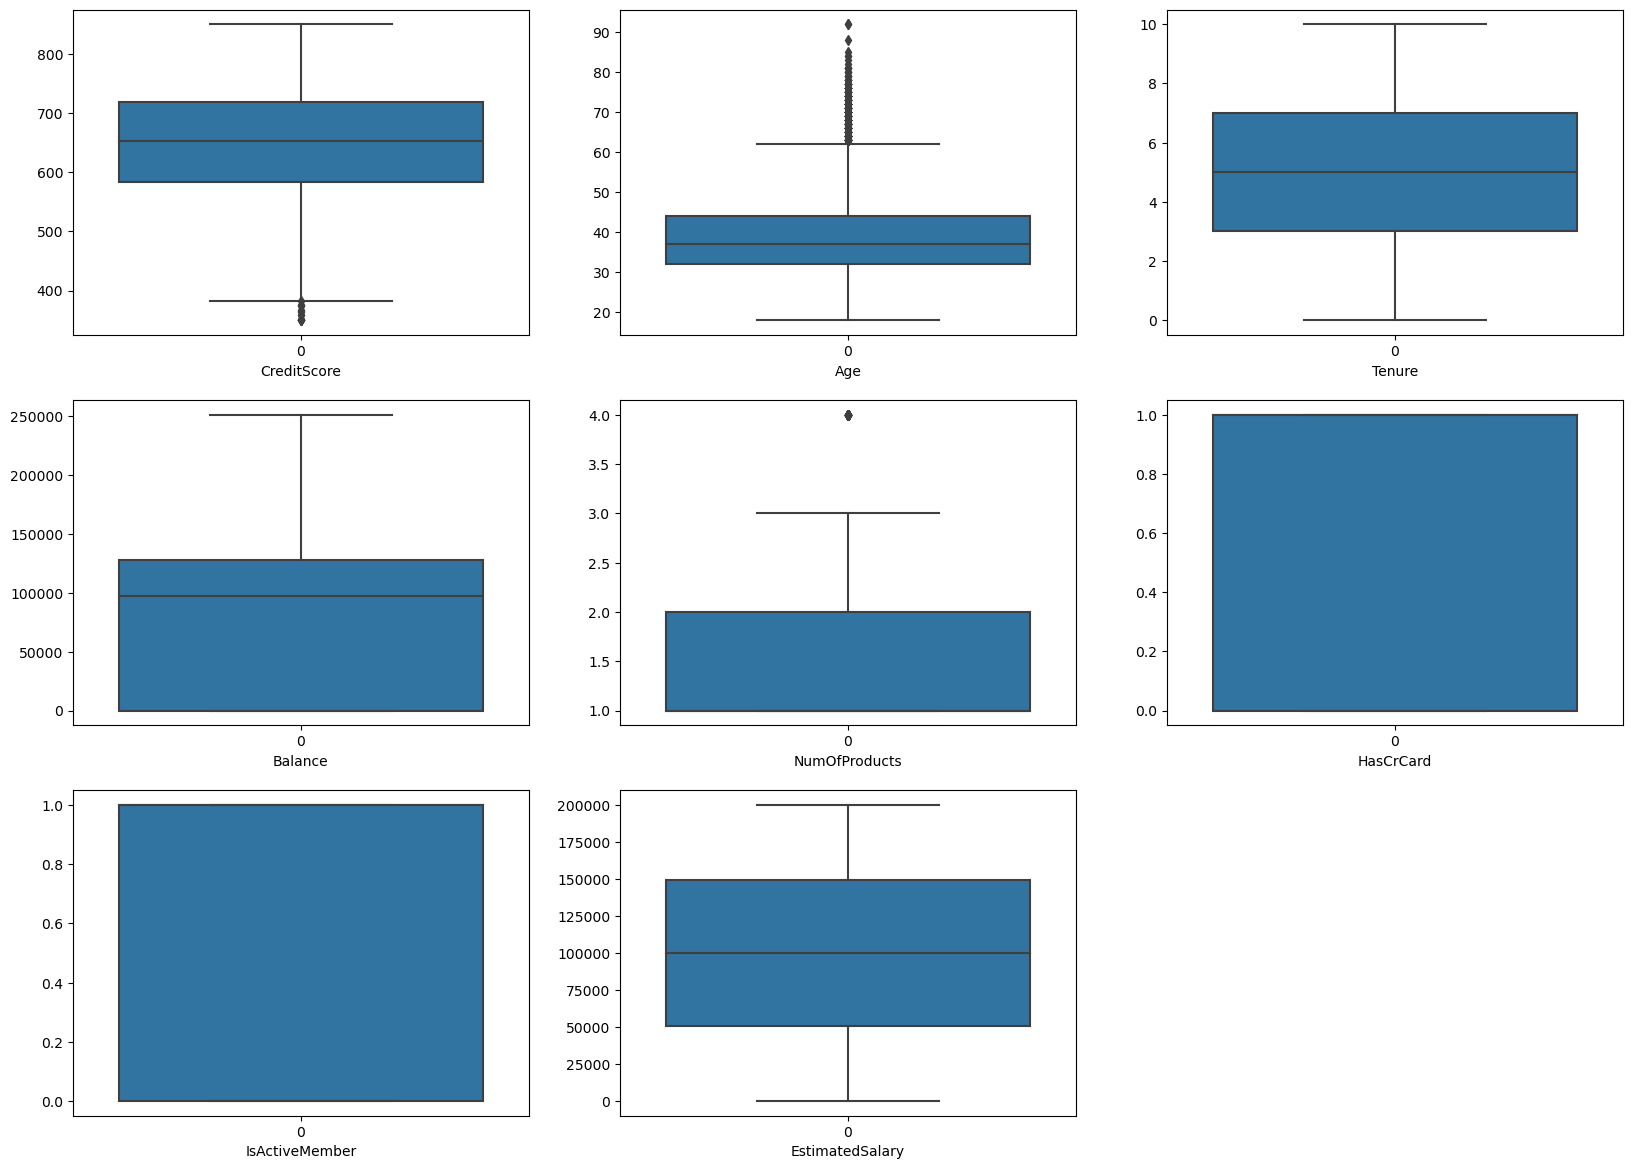

In [51]:
#boxplot on numerical features to find outliers


plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<Axes: >

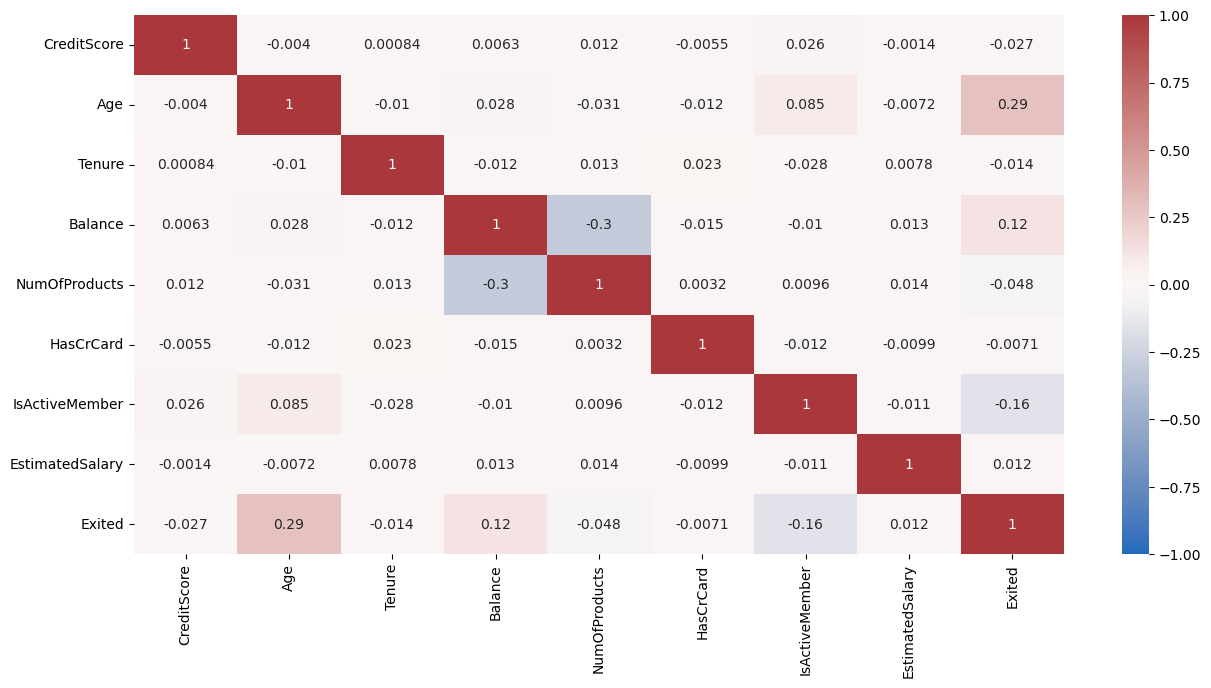

In [56]:
## Checking for correlation
# cor_mat=df.corr().round(2)
cor_mat = df.corr(numeric_only = True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True, vmin= -1, vmax = 1, center = 0, cmap = 'vlag')

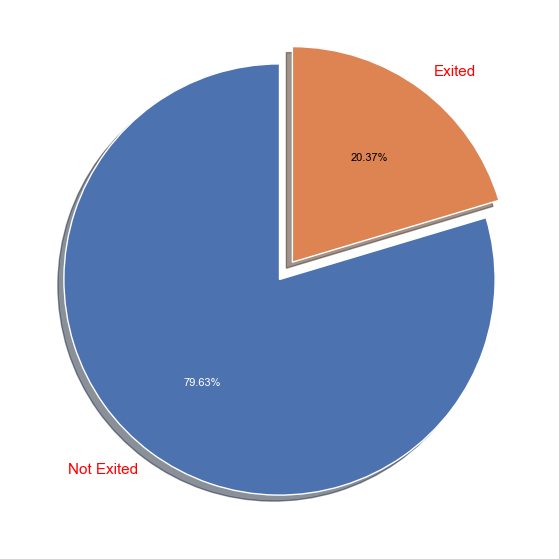

In [75]:
# visualizing the output variable 

values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (8, 7), dpi = 100)
explode = (0, 0.10)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'red')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

In [65]:
#Lebel encoding 

from sklearn.preprocessing import LabelEncoder


In [72]:
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [74]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
290,703,1,1,42,9,63227.00,1,0,1,137316.32,0
5658,747,2,1,41,9,0.00,1,1,0,32430.94,1
4646,805,1,0,26,8,42712.87,2,1,1,28861.69,0
98,710,2,1,22,8,0.00,2,0,0,99645.04,0
5625,508,0,0,60,7,143262.04,1,1,1,129562.74,0
9044,560,2,1,47,1,0.00,1,0,0,128882.66,1
1423,657,1,1,30,1,139762.13,2,1,1,23317.88,0
6958,679,2,1,33,4,96110.22,1,1,0,1173.23,0
4461,749,2,0,28,3,0.00,1,1,0,3408.70,0
3529,623,0,0,24,5,0.00,2,1,0,116160.04,0


In [76]:
#standardization of numerical values 

from sklearn.preprocessing import StandardScaler


In [77]:
df2 = df.copy()
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [79]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
columns_to_standardize = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
df2[columns_to_standardize] = scaler.fit_transform(df2[columns_to_standardize])

# Now, the selected columns are standardized with mean 0 and standard deviation 1
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,5,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,0,1,-0.373958,10,-0.306379,1,1,1,0.027988,0
9997,0.604988,0,0,-0.278604,7,-1.225848,1,0,1,-1.008643,1
9998,1.256835,1,1,0.293517,3,-0.022608,2,1,0,-0.125231,1


In [81]:
df3 = df2.copy()


In [ ]:
# importing library 

from sklearn.model_selection import train_test_split

In [104]:
X = df3.drop('Exited',axis=1)
y = df3['Exited']

In [106]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Splitting data into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.15, random_state=42, stratify=y_train)

# train and test datasets dimensions
X_train.shape, X_test.shape

((6800, 10), (2000, 10))

In [107]:
#importing SMOTE library 

from imblearn.over_sampling import SMOTE

In [109]:
# creating an instance
smote = SMOTE(random_state=27)
# applying it to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts()


0    5414
1    5414
Name: Exited, dtype: int64

In [110]:
y_train.value_counts()


0    5414
1    1386
Name: Exited, dtype: int64

In [111]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score, recall_score

In [112]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [114]:
#importing all the required ML packages


from sklearn.linear_model import LogisticRegression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree

In [115]:
# LogisticRegression

logr = LogisticRegression(max_iter = 1000)
logr.fit(X_train_smote, y_train_smote)
y_predict_lr = logr.predict(X_test)
generate_model_report(y_test, y_predict_lr)

Accuracy =  0.7195
Precision =  0.3909348441926346
Recall =  0.6781326781326781
F1 Score =  0.4959568733153638


In [116]:
# Random forest 

rf = RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state = 100, max_depth=6, min_samples_leaf=8)
rf.fit(X_train_smote, y_train_smote)
y_predict_rf = rf.predict(X_test)
generate_model_report(y_test, y_predict_rf)


Accuracy =  0.793
Precision =  0.49411764705882355
Recall =  0.7223587223587223
F1 Score =  0.5868263473053892
